In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the data from csv file
train=pd.read_csv("F:/My Folder/CV/Data Science/Analytics Vidhya/Big Mart/Train_UWu5bXk.csv")
type(train)
test=pd.read_csv("F:/My Folder/CV/Data Science/Analytics Vidhya/Big Mart/Test_u94Q5KV.csv")
type(test)

pandas.core.frame.DataFrame

In [3]:
#Combining both train and test dataset for EDA. Creating a new column "source" to specify which row 
#belongs to which dataser

train["source"]="train"
train.head(10)
test["source"]="test"
test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,test
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,test
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,test
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1,test
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1,test


In [4]:
#Concatenating train and test data
data=pd.concat([train,test], ignore_index=True , sort=False)
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [6]:
#EDA - Checking for NULL values
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [7]:
data.describe()
#From below description we can find 1) Item_Visibility is 0 which can not be possible if a product
#is for sale 2) Outlet Esta Year is from 1985 to 2009. We can covert this into how old a store is

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#For categorical variable to check the number of categories.This gives unique values for each variable
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [9]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [10]:
#Converting other fat cateogories into Low Fat and Regular

data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat',
'reg':'Regular'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [11]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [12]:
#There are 16 Item_Type categories.But from ITEM_Identifier we can see there are broadly 3 categories
#We will first try to find the first 2 letters from Item_Identifier and create new categories
data['Item_Type_New']=data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_New'].head(10)

0    FD
1    DR
2    FD
3    FD
4    NC
5    FD
6    FD
7    FD
8    FD
9    FD
Name: Item_Type_New, dtype: object

In [13]:
#Mapping the new categories
data['Item_Type_New']=data['Item_Type_New'].map({'FD':'Food','DR':'Drinks','NC':'Non Consumable'})
data['Item_Type_New'].head(10)

0              Food
1            Drinks
2              Food
3              Food
4    Non Consumable
5              Food
6              Food
7              Food
8              Food
9              Food
Name: Item_Type_New, dtype: object

In [14]:
#Outlet_Size has null values. Imputing null values as per mode by Outlet_Type
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [15]:
data['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [16]:
#Gives the count of null values in each Outlet Type
nu=data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x:sum(x.isnull()))
print(nu)

Outlet_Type  Grocery Store  Supermarket Type1  Supermarket Type2  \
Outlet_Size            925               3091                  0   

Outlet_Type  Supermarket Type3  
Outlet_Size                  0  


In [17]:
from statistics import mode

outlet_mode=data.pivot_table(values='Outlet_Size',columns='Outlet_Type',
                             aggfunc=(lambda x: mode(x)))
print (outlet_mode)

Outlet_Type Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size             Small            Medium            Medium


In [18]:
#From the data we can see Outlet_Type has 4 categories out of which all Grocery Store has 
#size as small. So mode for Grocery Store is small. Also for Supermarket Type1 mode is small 
#Supermarket Type2 Supermarket Type3 do not have any null values. So overall mode is small 

boolean=data['Outlet_Size'].isnull()
print(boolean.head())

0    False
1    False
2    False
3     True
4    False
Name: Outlet_Size, dtype: bool


In [113]:
#Imputing missing values for Outles_Size
#data.loc[boolean,'Outlet_Size']=data.loc[boolean,'Outlet_Type'].apply(lambda x:outlet_mode[x])
#This code is not working as we have more null values than Small values for Grocery store. 
#So not able to find mode automatically

In [19]:
#Imputing missing values for Outles_Size

data['Outlet_Size'].fillna(value = 'Small',inplace = True)
print (sum(data['Outlet_Size'].isnull()))

0


In [20]:
#Imputing null values for Item_Weight. We will find the average weight of item by Item_Identifier
print (sum(data['Item_Weight'].isnull()))
item_avg_weight = data.pivot_table(values='Item_Weight', columns='Item_Identifier')
print(item_avg_weight)
boolean=data['Item_Weight'].isnull()
print(boolean.head(10))

2439
Item_Identifier  DRA12  DRA24  DRA59  DRB01  DRB13  DRB24  DRB25  DRB48  \
Item_Weight       11.6  19.35   8.27   7.39  6.115  8.785   12.3  16.75   

Item_Identifier  DRC01  DRC12  ...    NCZ05  NCZ06  NCZ17  NCZ18  NCZ29  \
Item_Weight       5.92  17.85  ...    8.485   19.6  12.15  7.825   15.0   

Item_Identifier  NCZ30  NCZ41  NCZ42  NCZ53  NCZ54  
Item_Weight       6.59  19.85   10.5    9.6  14.65  

[1 rows x 1559 columns]
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
Name: Item_Weight, dtype: bool


In [21]:
#Replacing Item_weight null values
data.loc[boolean,'Item_Weight']=data.loc[boolean,'Item_Identifier'].apply(lambda x:item_avg_weight[x])
print(sum(data['Item_Weight'].isnull()))

0


In [22]:
#Feature Engineering
# Outlet Establishment Year is from 1985 to 2009. We can covert this into how old a store is. 
#This can directly impact the sales.

data['Total_Outlet_Years']=2013-data['Outlet_Establishment_Year']
print(data['Total_Outlet_Years'].head(10))

0    14
1     4
2    14
3    15
4    26
5     4
6    26
7    28
8    11
9     6
Name: Total_Outlet_Years, dtype: int64


In [23]:
#Item visibility for some products is 0 which can not be possible if a product is for sale
#So we have to replace the 0 values. From data we can see Items belonging to same Item_Identifier 
#category has more or less same Item_Visibility.So we can find the average based on Item_Identifier
#and use it to replace the 0 values.

Item_Visibility_Avg=data.pivot_table(values='Item_Visibility',columns='Item_Identifier')
print(Item_Visibility_Avg.head(10))
boolean=data['Item_Visibility'] == 0
print(boolean.head(10))

Item_Identifier     DRA12     DRA24     DRA59     DRB01     DRB13     DRB24  \
Item_Visibility  0.034938  0.045646  0.133384  0.079736  0.006799  0.020596   

Item_Identifier     DRB25     DRB48     DRC01     DRC12    ...       NCZ05  \
Item_Visibility  0.079407  0.023973  0.020653  0.037862    ...     0.06303   

Item_Identifier     NCZ06     NCZ17     NCZ18     NCZ29     NCZ30     NCZ41  \
Item_Visibility  0.102096  0.076568  0.180954  0.076774  0.027302  0.056396   

Item_Identifier     NCZ42    NCZ53     NCZ54  
Item_Visibility  0.011015  0.02633  0.081345  

[1 rows x 1559 columns]
0    False
1    False
2    False
3     True
4     True
5     True
6    False
7    False
8    False
9    False
Name: Item_Visibility, dtype: bool


In [24]:
#Replacing 0 values from Item_Visibility

data.loc[boolean,'Item_Visibility']=data.loc[boolean,'Item_Identifier'].apply(lambda x:Item_Visibility_Avg[x])
print(sum(data['Item_Visibility']== 0))
type('Item_Visibility_Avg')

0


str

In [25]:
#As per our Hypothesis Items having high visibility are supposed to have higher sales. So we can
#create another variable to determine the mean ratio for Item_visibility by using the 
#Item_Visibility_Avg variable created above
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/Item_Visibility_Avg[x['Item_Identifier']], axis=1)
print(data['Item_Visibility_MeanRatio'].head())

0    0.931078
1    0.933420
2    0.960069
3    1.000000
4    1.000000
Name: Item_Visibility_MeanRatio, dtype: float64


In [26]:
#One Hot Encoding of all categorical variables. we will have to convert all categorical variable into
#numerical as LabelEncoder works on numerical data only
data.info()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 16 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       14204 non-null object
Item_Type_New                14204 non-null object
Total_Outlet_Years           14204 non-null int64
Item_Visibility_MeanRatio    14204 non-null float64
dtypes: float64(5), int64(2), object(9)
memory usage: 1.7+ MB


In [27]:
#Creating a new variable Outlet same as Outlet_Identifier as we need it for output submission file

data['Outlet']=le.fit_transform(data['Outlet_Identifier'])
data['Outlet'].head()
print(data.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.017834   
4           NCD19         8.93          Low Fat         0.009780   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [28]:
#Grouping all categorical variables  and converting them into numerical form

var=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type',
    'Item_Type_New','Outlet']

for i in var:
    data[i]=le.fit_transform(data[i])

In [29]:
#one hot encoding

data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Size',
    'Outlet_Location_Type','Outlet_Type','Item_Type_New','Outlet'])

In [30]:
data.head(6)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Total_Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.300,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0.009780,Household,53.8614,OUT013,1987,994.7052,train,26,...,0,1,0,0,0,0,0,0,0,0
5,FDP36,10.395,0.057059,Baking Goods,51.4008,OUT018,2009,556.6088,train,4,...,0,0,0,1,0,0,0,0,0,0


In [31]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Total_Outlet_Years,Item_Visibility_MeanRatio,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,...,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.793380,0.069710,141.004977,1997.830681,2181.288914,15.169319,1.061884,0.646649,0.353351,0.109335,...,0.065123,0.109335,0.108631,0.108843,0.061954,0.109758,0.109124,0.108983,0.109124,0.109124
std,4.651716,0.049728,62.086938,8.371664,1706.499616,8.371664,0.235907,0.478027,0.478027,0.312071,...,0.246751,0.312071,0.311187,0.311453,0.241081,0.312599,0.311806,0.311629,0.311806,0.311806
min,4.555000,0.003575,31.290000,1985.000000,33.290000,4.000000,0.844563,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.710000,0.031145,94.012000,1987.000000,834.247400,9.000000,0.925131,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.600000,0.057194,142.247000,1999.000000,1794.331000,14.000000,0.999070,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.750000,0.096930,185.855600,2004.000000,3101.296400,26.000000,1.042007,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000,3.010094,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 36 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Item_Outlet_Sales            8523 non-null float64
source                       14204 non-null object
Total_Outlet_Years           14204 non-null int64
Item_Visibility_MeanRatio    14204 non-null float64
Item_Fat_Content_0           14204 non-null uint8
Item_Fat_Content_1           14204 non-null uint8
Outlet_Size_0                14204 non-null uint8
Outlet_Size_1                14204 non-null uint8
Outlet_Size_2                14204 non-null uint8
Outlet_Location_Type_0       14204 non-null uint8
Outlet_Location_Type_1      

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Total_Outlet_Years             int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_New_0                uint8
Item_Type_New_1                uint8
Item_Type_New_2                uint8
Outlet_0                       uint8
O

In [33]:
data[['Item_Type_New_0','Item_Type_New_1','Item_Type_New_2']].head(10)

,Item_Type_New_0,Item_Type_New_1,Item_Type_New_2
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [34]:
#Dropping modified columns from final data
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace = True)

In [35]:
#Seperating train and test data
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

In [36]:
#dropping source column from train
train.head(10)
train.drop(['source'],axis=1,inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 33 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Visibility              8523 non-null float64
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Total_Outlet_Years           8523 non-null int64
Item_Visibility_MeanRatio    8523 non-null float64
Item_Fat_Content_0           8523 non-null uint8
Item_Fat_Content_1           8523 non-null uint8
Outlet_Size_0                8523 non-null uint8
Outlet_Size_1                8523 non-null uint8
Outlet_Size_2                8523 non-null uint8
Outlet_Location_Type_0       8523 non-null uint8
Outlet_Location_Type_1       8523 non-null uint8
Outlet_Location_Type_2       8523 non-null uint8
Outlet_Type_0                8523 non-null uint8
Outlet_Type_1                8523 non-null uint8

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Total_Outlet_Years,Item_Visibility_MeanRatio,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,14,0.931078,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,4,0.933420,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,14,0.960069,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,182.0950,OUT010,732.3800,15,1.000000,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,53.8614,OUT013,994.7052,26,1.000000,1,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
#Dropping Source and Item_Outlet_Sales column from test
test.drop(['source','Item_Outlet_Sales'],axis=1,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 8523 to 14203
Data columns (total 32 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Visibility              5681 non-null float64
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Total_Outlet_Years           5681 non-null int64
Item_Visibility_MeanRatio    5681 non-null float64
Item_Fat_Content_0           5681 non-null uint8
Item_Fat_Content_1           5681 non-null uint8
Outlet_Size_0                5681 non-null uint8
Outlet_Size_1                5681 non-null uint8
Outlet_Size_2                5681 non-null uint8
Outlet_Location_Type_0       5681 non-null uint8
Outlet_Location_Type_1       5681 non-null uint8
Outlet_Location_Type_2       5681 non-null uint8
Outlet_Type_0                5681 non-null uint8
Outlet_Type_1                5681 non-null uint8
Outlet_Type_2                5681 non-null uin

In [39]:
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Total_Outlet_Years,Item_Visibility_MeanRatio,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,FDW58,20.750,0.007565,107.8622,OUT049,14,1.029192,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8524,FDW14,8.300,0.038428,87.3198,OUT017,6,1.130311,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8525,NCN55,14.600,0.099575,241.7538,OUT010,15,1.735215,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8526,FDQ58,7.315,0.015388,155.0340,OUT017,6,1.291577,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8527,FDY38,13.600,0.118599,234.2300,OUT027,28,0.917824,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [40]:
#Exporting modified files to csv
train.to_csv("F:/My Folder/CV/Data Science/Analytics Vidhya/Big Mart/Train_Mod.csv",index=False)
test.to_csv("F:/My Folder/CV/Data Science/Analytics Vidhya/Big Mart/Test_Mod.csv",index=False)

In [41]:
#Model  Building

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

linear=LinearRegression(normalize=True)

In [42]:
target='Item_Outlet_Sales'
y_target=train[target]
print(y_target.head())
predictors = [x for x in train.columns if x not in 'Item_Outlet_Sales'+'Outlet_Identifier'+
              'Item_Identifier']
print(predictors)

# Removing target and Item_Identifier(converted it into Item_Type_New) from the 
#final list of predictors

x_predictors= train[predictors]
print(x_predictors.head())

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Total_Outlet_Years', 'Item_Visibility_MeanRatio', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_New_0', 'Item_Type_New_1', 'Item_Type_New_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']
   Item_Weight  Item_Visibility  Item_MRP  Total_Outlet_Years  \
0         9.30         0.016047  249.8092                  14   
1         5.92         0.019278   48.2692                   4   
2        17.50         0.016760  141.6180                  14   
3        19.20         0.017834  182.0950                  15   
4         8.93         0.009780   53.8614   

In [43]:
#Implementing linear model
linear_model=linear.fit(x_predictors,y_target)
print(linear_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [44]:
#Intercept of the regression model
linear.intercept_

1103563886941648.2

In [45]:
#Coefficients of the independant variables
linear.coef_

array([-2.00668014e-02, -1.97214139e+02,  1.55894075e+01,  1.23657396e+14,
        3.10364570e+01, -1.45798564e+15, -1.45798564e+15,  5.43158395e+15,
        1.13070707e+16, -2.88151786e+15,  5.20532981e+15, -3.57137143e+15,
       -1.06329548e+16,  1.46971685e+16,  2.34673796e+16,  1.80843663e+14,
        2.56540495e+16, -2.22063553e+16, -2.22063553e+16, -2.22063553e+16,
        1.95232203e+16,  1.07967606e+15,  4.80434240e+15,  2.12111879e+16,
        2.07738954e+15, -7.22979545e+15,  4.43337021e+15,  4.18605542e+15,
       -5.20893279e+15, -1.91502066e+16])

In [46]:
#Coefficient along with independant variale names
coeff=pd.Series(linear.coef_,predictors).sort_values()
print(coeff)

Item_Type_New_2             -2.220636e+16
Item_Type_New_0             -2.220636e+16
Item_Type_New_1             -2.220636e+16
Outlet_9                    -1.915021e+16
Outlet_Location_Type_2      -1.063295e+16
Outlet_5                    -7.229795e+15
Outlet_8                    -5.208933e+15
Outlet_Location_Type_1      -3.571371e+15
Outlet_Size_2               -2.881518e+15
Item_Fat_Content_0          -1.457986e+15
Item_Fat_Content_1          -1.457986e+15
Item_Visibility             -1.972141e+02
Item_Weight                 -2.006680e-02
Item_MRP                     1.558941e+01
Item_Visibility_MeanRatio    3.103646e+01
Total_Outlet_Years           1.236574e+14
Outlet_Type_2                1.808437e+14
Outlet_1                     1.079676e+15
Outlet_4                     2.077390e+15
Outlet_7                     4.186055e+15
Outlet_6                     4.433370e+15
Outlet_2                     4.804342e+15
Outlet_Location_Type_0       5.205330e+15
Outlet_Size_0                5.431

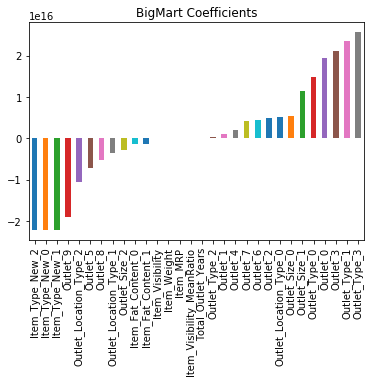

In [48]:
coeff.plot(kind='bar',title = 'BigMart Coefficients')

In [49]:
#Predicting sales in train data
sales_predictions=linear_model.predict(train[predictors])
print(sales_predictions)

[4052.25  532.25 2364.25 ... 1506.25 1404.25 1228.25]


In [50]:
# 10 fold Cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
cv_score = cross_val_score(linear_model,train[predictors],train[target],cv=10)
print(cv_score)

[0.56069647 0.58232239 0.54262557 0.5671034  0.51120273 0.5760183
 0.57857709 0.55570758 0.58046535 0.54804579]


In [66]:
#Getting accuracy of the model. Calculating r2
accuracy = metrics.r2_score(y_target,sales_predictions)
print(accuracy)

0.5634365235404442


In [76]:
#Calculating RMSE value
rmse_linear = np.sqrt(metrics.mean_squared_error(y_target,sales_predictions))
print(rmse_linear)

1127.4684948703716


Text(0.5, 1.0, 'Residual plot')

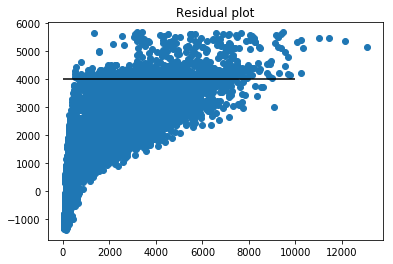

In [74]:
#Prediction vs actual values residual scatterplot.Check the below link for meaning
#https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/
plt.scatter(y_target,sales_predictions)

plt.hlines(y=4000, xmin= 0, xmax=10000)
plt.title('Residual plot')

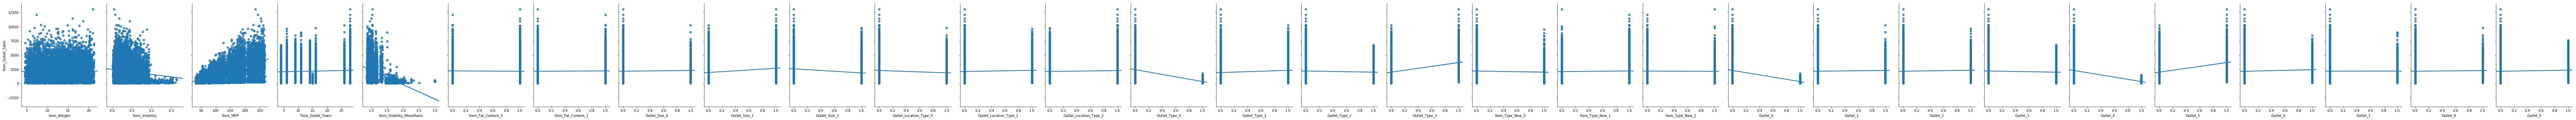

In [79]:
#Plotting Least square lines. This shows how the regression line is passing for each variable.

import seaborn as sns
sns.pairplot(train,x_vars=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Total_Outlet_Years', 
                           'Item_Visibility_MeanRatio', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
                           'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2', 
                           'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 
                           'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
                           'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_New_0', 'Item_Type_New_1', 
                           'Item_Type_New_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 
                           'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
                           y_vars = 'Item_Outlet_Sales',height = 5,aspect =0.7,kind = 'reg')

In [58]:
#Predicting on test data now
test_sales_pred = linear_model.predict(test[predictors])
print(test_sales_pred)
type(test_sales_pred)

[1844.25 1555.25 1900.25 ... 1808.75 3525.25 1260.75]


numpy.ndarray

In [59]:
test['Item_Outlet_Sales'] = test_sales_pred
test.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Total_Outlet_Years,Item_Visibility_MeanRatio,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,...,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Outlet_Sales
8523,FDW58,20.750,0.007565,107.8622,OUT049,14,1.029192,1,0,0,...,0,0,0,0,0,0,0,0,1,1844.25
8524,FDW14,8.300,0.038428,87.3198,OUT017,6,1.130311,0,1,0,...,0,1,0,0,0,0,0,0,0,1555.25
8525,NCN55,14.600,0.099575,241.7538,OUT010,15,1.735215,1,0,0,...,0,0,0,0,0,0,0,0,0,1900.25
8526,FDQ58,7.315,0.015388,155.0340,OUT017,6,1.291577,1,0,0,...,0,1,0,0,0,0,0,0,0,2591.25
8527,FDY38,13.600,0.118599,234.2300,OUT027,28,0.917824,0,1,0,...,0,0,0,0,1,0,0,0,0,5180.25


In [60]:
#Creating the final dataframe of result
final_submission= pd.DataFrame(test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']])
print(final_submission.head())

     Item_Identifier Outlet_Identifier  Item_Outlet_Sales
8523           FDW58            OUT049            1844.25
8524           FDW14            OUT017            1555.25
8525           NCN55            OUT010            1900.25
8526           FDQ58            OUT017            2591.25
8527           FDY38            OUT027            5180.25


In [65]:
#Saving the result to a csv file.
final_submission.to_csv("F:/My Folder/CV/Data Science/Analytics Vidhya/Big Mart/submission_linear.csv",index=False)